In [1]:
import pickle
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def load_pickle(f):
    with open(f, "rb") as fh:
        result = pickle.load(fh)
    return result

## Load results

In [3]:
oxidation_parse_dict = load_pickle("20190820-173457-csd_ox_parse_output.pkl")

In [15]:
oxidation_reference_dict = load_pickle(
    "20190820-220518-csd_ox_parse_output_reference.pkl"
)

In [4]:
## Sanity Checks

In [5]:
list(oxidation_parse_dict.keys())[0]

'ABAXOT'

In [6]:
len(oxidation_parse_dict)

94715

Find the number of empty entries

In [7]:
count = 0
name_list = []
for k, v in oxidation_parse_dict.items():
    if v == {}:
        count += 1
    else:
        name_list.append(k)
print(f"the ratio of empty entries is {count/len(oxidation_parse_dict)}")

the ratio of empty entries is 0.4799134244839782


In [8]:
name_list[0]

'ABAXOT'

In [9]:
with open("name_list.pkl", "wb") as fh:
    pickle.dump(name_list, fh)

In [77]:
len(name_list)

49260

Half of the structures have entries ... this looks like a nice training set!

In [10]:
elemental_oxidation_states = defaultdict(list)

for k, v in oxidation_parse_dict.items():
    if v != {}:
        for elem in v.keys():
            elemental_oxidation_states[elem].append(v[elem])

In [16]:
elemental_oxidation_states_reference = defaultdict(list)

for k, v in oxidation_reference_dict.items():
    if v != {}:
        for elem in v.keys():
            elemental_oxidation_states_reference[elem].append(v[elem])

In [11]:
elemental_oxidation_states_flat = {}

for elem in elemental_oxidation_states.keys():
    elemental_oxidation_states_flat[elem] = [
        item for sublist in elemental_oxidation_states[elem] for item in sublist
    ]

In [17]:
elemental_oxidation_states_flat_reference = {}

for elem in elemental_oxidation_states_reference.keys():
    elemental_oxidation_states_flat_reference[elem] = [
        item
        for sublist in elemental_oxidation_states_reference[elem]
        for item in sublist
    ]

In [104]:
counter = []
for elem in elemental_oxidation_states_flat.keys():
    counter.append(
        {"count": len(elemental_oxidation_states_flat[elem]), "element": elem}
    )

In [105]:
counter_reference = []
for elem in elemental_oxidation_states_flat_reference.keys():
    counter_reference.append(
        {"count": len(elemental_oxidation_states_flat_reference[elem]), "element": elem}
    )

df_count_reference = pd.DataFrame(counter_reference)

In [106]:
import pandas as pd

df_count = pd.DataFrame(counter)
df_count.head()

,count,element
0,6538,Zn
1,5490,Cd
2,4621,Ag
3,2493,Ni
4,11440,Cu


In [107]:
counts_comparison_df = df_count.merge(
    df_count_reference, left_on="element", right_on="element"
)

In [108]:
counts_comparison_df["mof_normalized"] = (
    counts_comparison_df["count_x"] / counts_comparison_df["count_x"].sum()
)
counts_comparison_df["all_normalized"] = (
    counts_comparison_df["count_y"] / counts_comparison_df["count_y"].sum()
)

In [111]:
import numpy as np

counts_comparison_df["difference"] = np.abs(
    counts_comparison_df["mof_normalized"] - counts_comparison_df["all_normalized"]
)

In [113]:
counts_comparison_df.sort_values(by="difference", ascending=False).head()

,count_x,element,count_y,mof_normalized,all_normalized,difference
1,5490,Cd,3053,0.099697,0.033386,0.066311
39,101,Pd,5320,0.001834,0.058177,0.056343
0,6538,Zn,6445,0.118728,0.070480,0.048249
2,4621,Ag,3288,0.083916,0.035956,0.047960
15,180,Pt,4059,0.003269,0.044387,0.041119


In [115]:
from collections import Counter


def relative_counter(l):
    counter = Counter(l)
    total = sum(counter.values(), 0.0)
    for key in counter:
        counter[key] /= total

    return dict(counter)

In [119]:
found_oxidation_states = []
for elem in elemental_oxidation_states_flat.keys():
    distribution = relative_counter(elemental_oxidation_states_flat[elem])
    found_oxidation_states.append(
        {
            "counter": distribution,
            "ox_states": list(distribution.keys()),
            "element": elem,
        }
    )

df_oxidation_states_mof = pd.DataFrame(found_oxidation_states)
df_oxidation_states_mof.head()

,counter,element,ox_states
0,"{2: 0.9998470480269196, 1: 0.00015295197308045...",Zn,"[2, 1]"
1,"{2: 0.9990892531876139, 3: 0.00072859744990892...",Cd,"[2, 3, 1]"
2,"{1: 0.9969703527375027, 2: 0.003029647262497295}",Ag,"[1, 2]"
3,"{2: 0.9903730445246691, 3: 0.00882470918572001...",Ni,"[2, 3, 1]"
4,"{1: 0.24213286713286714, 2: 0.7575174825174825...",Cu,"[1, 2, 3]"


In [120]:
found_oxidation_states_reference = []
for elem in elemental_oxidation_states_flat_reference.keys():
    distribution = relative_counter(elemental_oxidation_states_flat_reference[elem])
    found_oxidation_states_reference.append(
        {
            "counter": distribution,
            "ox_states": list(distribution.keys()),
            "element": elem,
        }
    )

df_oxidation_states_reference = pd.DataFrame(found_oxidation_states_reference)
df_oxidation_states_reference.head()

,counter,element,ox_states
0,"{2: 0.956592733705266, 1: 0.010341543067083956...",Ni,"[2, 1, 3, 4]"
1,"{2: 0.7632950990615224, 1: 0.23364181438998957...",Cu,"[2, 1, 3]"
2,"{2: 0.8647450110864745, 4: 0.1111111111111111,...",Pt,"[2, 4, 3, 1]"
3,"{2: 0.9800751879699248, 1: 0.00921052631578947...",Pd,"[2, 1, 4, 3, 5]"
4,"{6: 0.5401360544217687, 4: 0.29931972789115646...",U,"[6, 4, 3, 5, 2]"


In [121]:
df_counter = df_oxidation_states_mof.merge(
    df_oxidation_states_reference, left_on="element", right_on="element"
)

In [123]:
df_stats_merged = df_counter.merge(
    counts_comparison_df, left_on="element", right_on="element"
)
df_stats_merged.head()

,counter_x,element,ox_states_x,counter_y,ox_states_y,count_x,count_y,mof_normalized,all_normalized,difference
0,"{2: 0.9998470480269196, 1: 0.00015295197308045...",Zn,"[2, 1]","{2: 0.9993793638479441, 1: 0.0006206361520558572}","[2, 1]",6538,6445,0.118728,0.070480,0.048249
1,"{2: 0.9990892531876139, 3: 0.00072859744990892...",Cd,"[2, 3, 1]","{2: 0.998689813298395, 3: 0.000655093350802489...","[2, 3, 1]",5490,3053,0.099697,0.033386,0.066311
2,"{1: 0.9969703527375027, 2: 0.003029647262497295}",Ag,"[1, 2]","{1: 0.9914841849148418, 2: 0.00669099756690997...","[1, 2, 3]",4621,3288,0.083916,0.035956,0.047960
3,"{2: 0.9903730445246691, 3: 0.00882470918572001...",Ni,"[2, 3, 1]","{2: 0.956592733705266, 1: 0.010341543067083956...","[2, 1, 3, 4]",2493,7349,0.045272,0.080365,0.035093
4,"{1: 0.24213286713286714, 2: 0.7575174825174825...",Cu,"[1, 2, 3]","{2: 0.7632950990615224, 1: 0.23364181438998957...","[2, 1, 3]",11440,15344,0.207747,0.167795,0.039952


In [124]:
df_stats_merged.to_pickle("statistics.pkl")

## Analyze the distributions

### What elements do we have?

In [12]:
elemental_oxidation_states_flat.keys()

dict_keys(['Zn', 'Cd', 'Ag', 'Ni', 'Cu', 'Co', 'Nd', 'Ho', 'Mn', 'Bi', 'Tb', 'Fe', 'U', 'Pb', 'Eu', 'Pt', 'Cs', 'Pr', 'Cr', 'Nb', 'Mg', 'Ce', 'Ca', 'Er', 'Hg', 'Gd', 'La', 'Sn', 'W', 'Mo', 'Th', 'In', 'Sr', 'Sm', 'Ru', 'Au', 'V', 'Na', 'Zr', 'Pd', 'Ba', 'Yb', 'Ti', 'K', 'Dy', 'Lu', 'Tl', 'Y', 'Li', 'Sc', 'Ga', 'Rh', 'Tm', 'Os', 'Np', 'Rb', 'Hf', 'Ir', 'Ta', 'Am', 'Re', 'Pu', 'Be'])

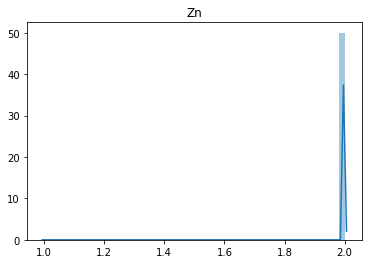

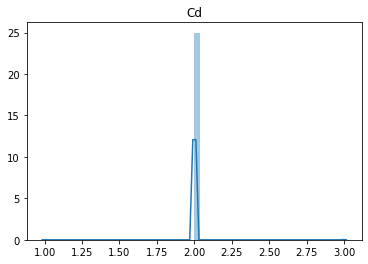

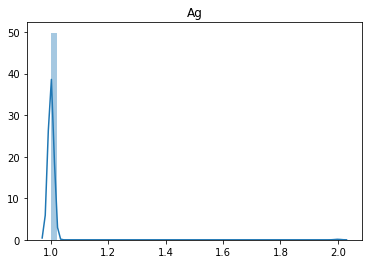

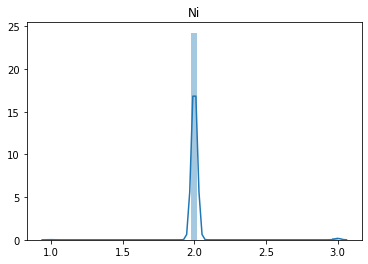

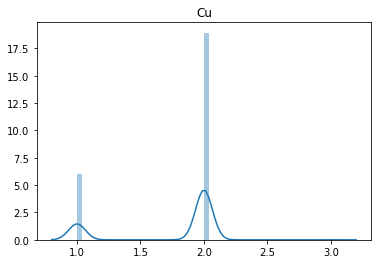

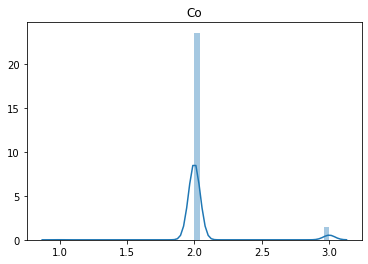

problem plotting Nd


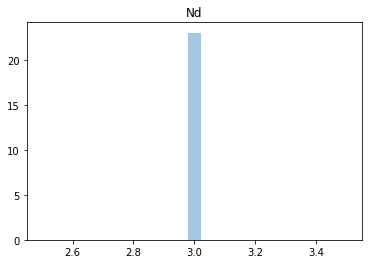

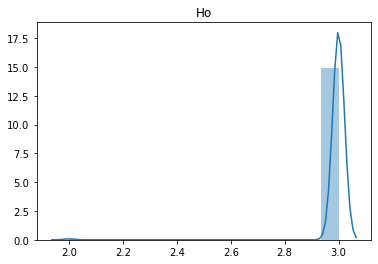

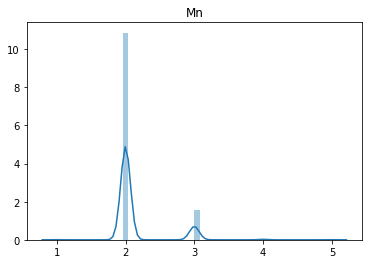

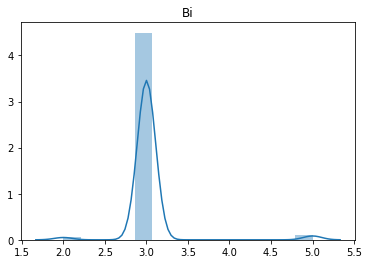

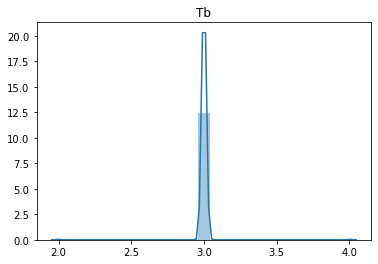

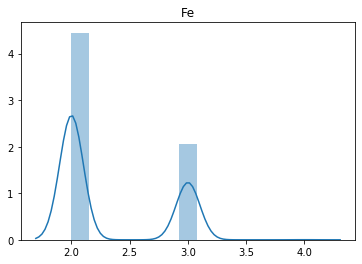

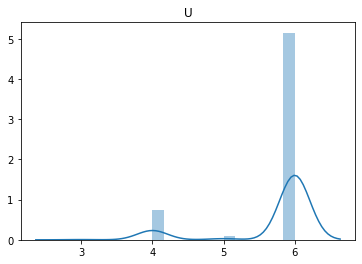

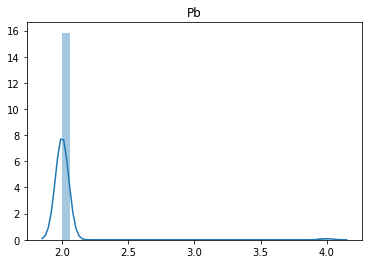

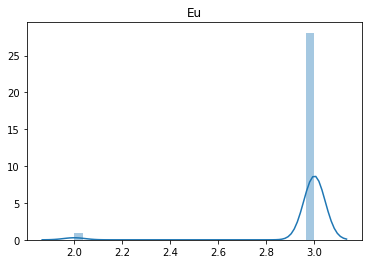

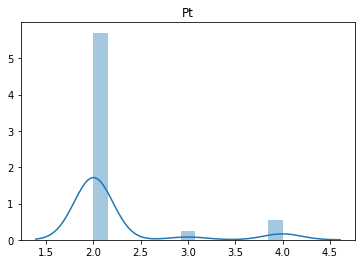

problem plotting Cs


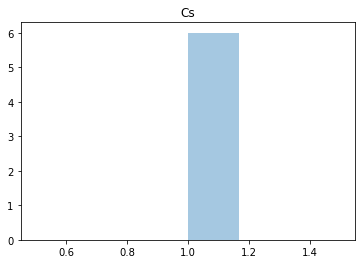

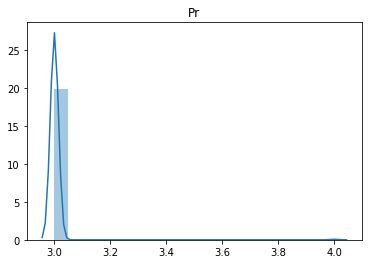

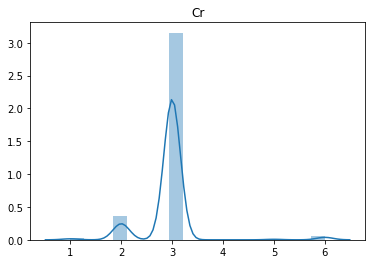

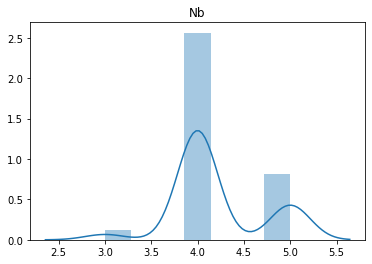

problem plotting Mg


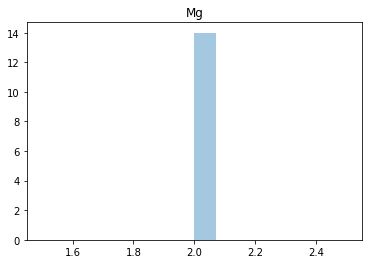

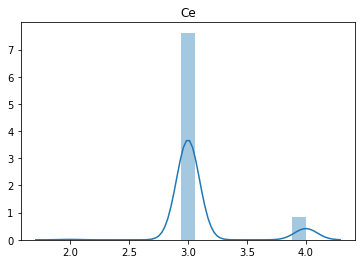

problem plotting Ca


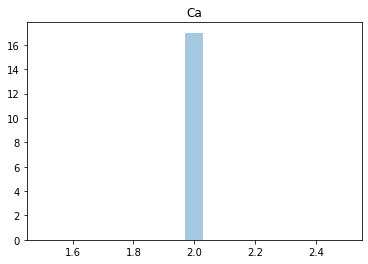

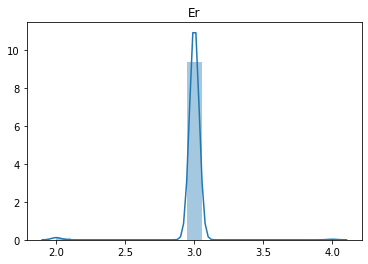

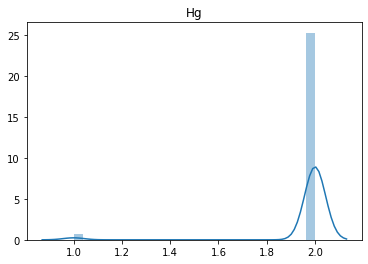

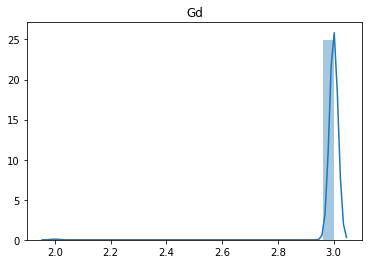

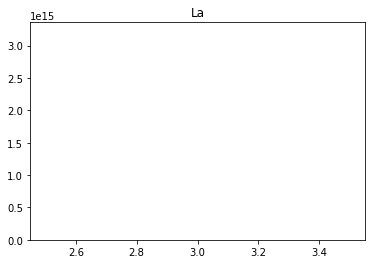

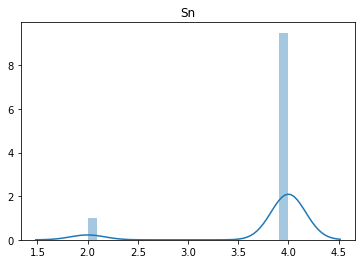

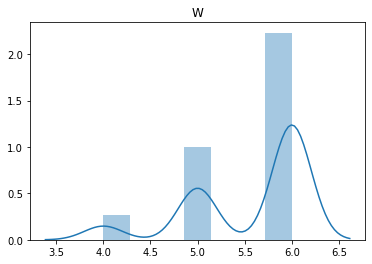

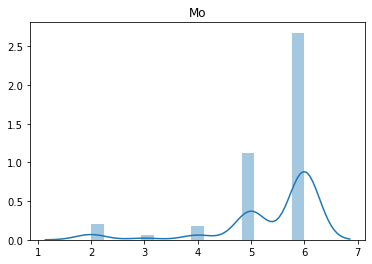

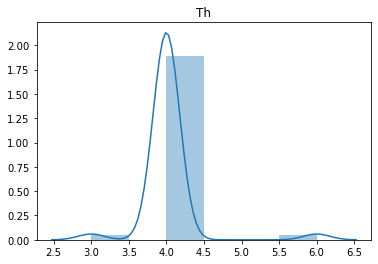

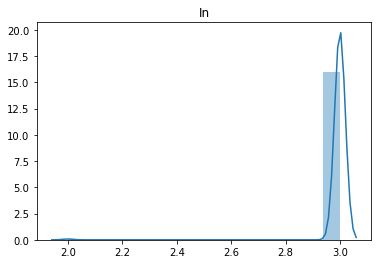

problem plotting Sr


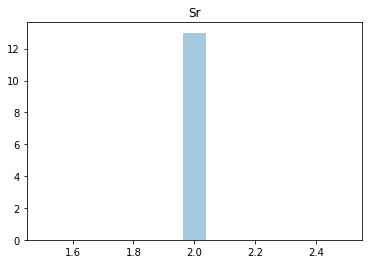

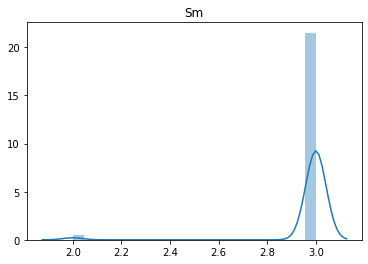

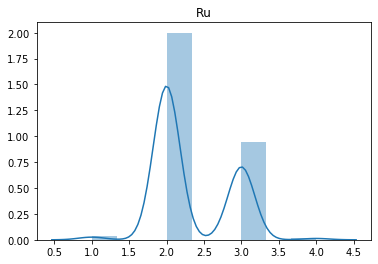

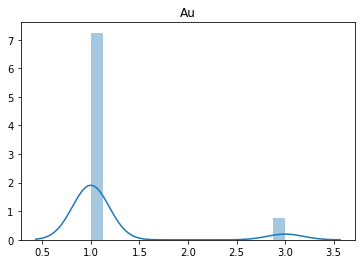

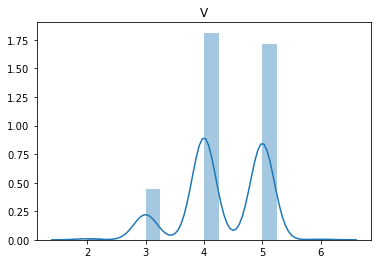

problem plotting Na


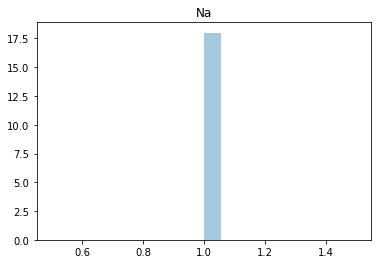

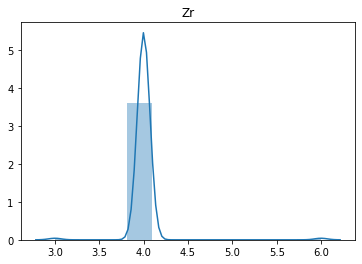

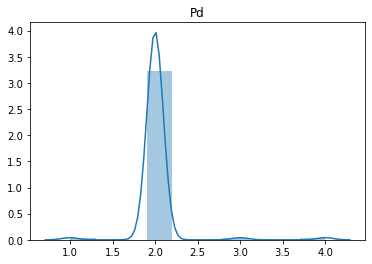

problem plotting Ba


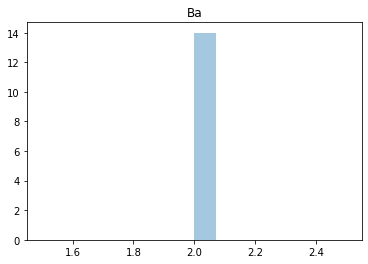

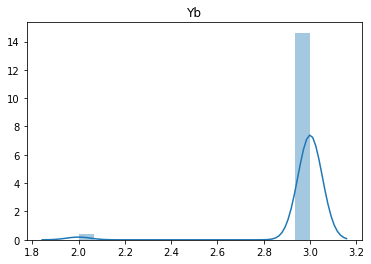

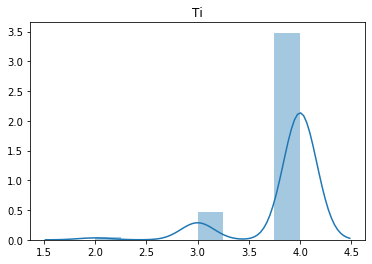

problem plotting K


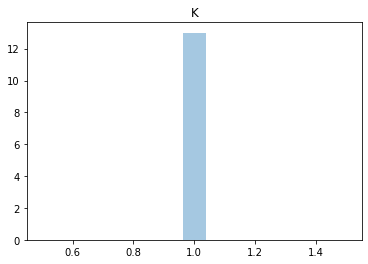

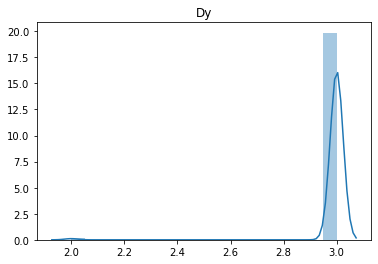

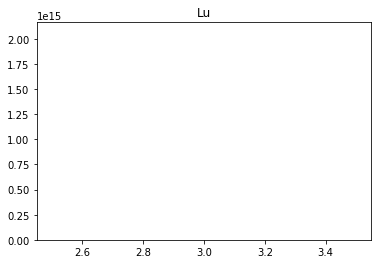

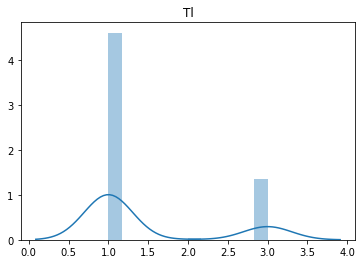

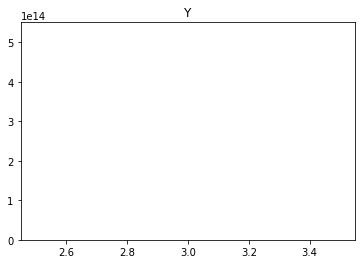

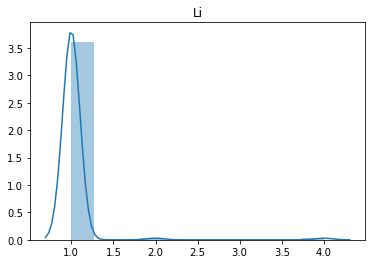

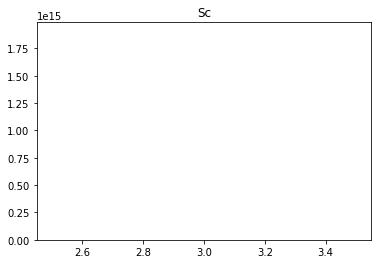

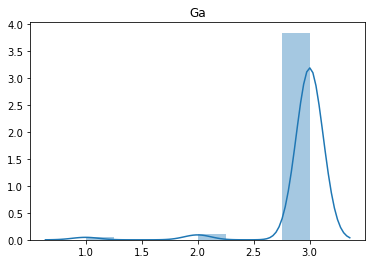

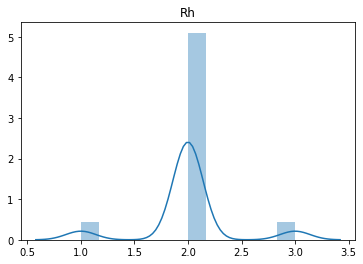

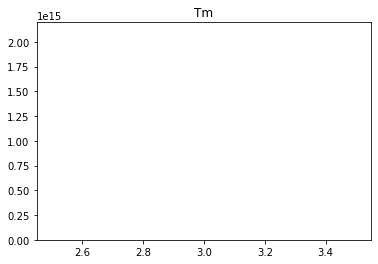

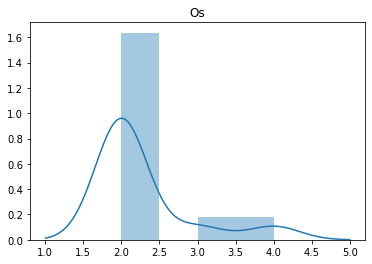

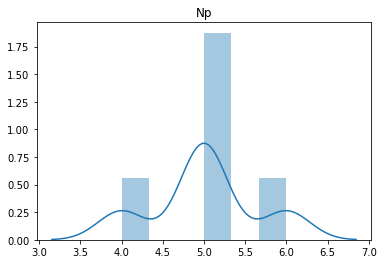

problem plotting Rb


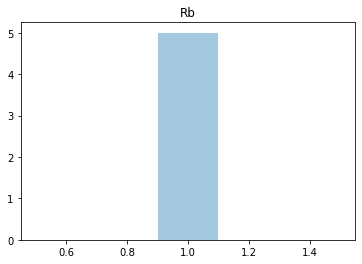

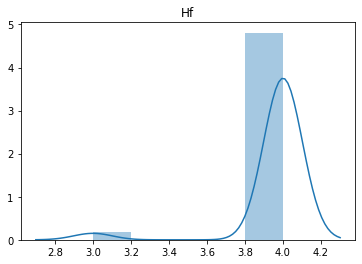

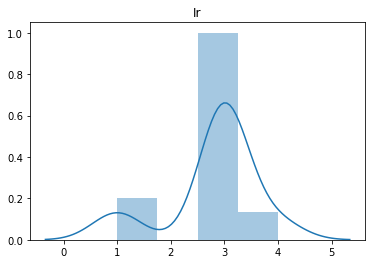

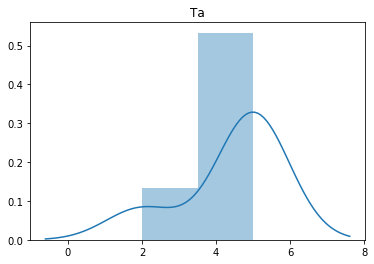

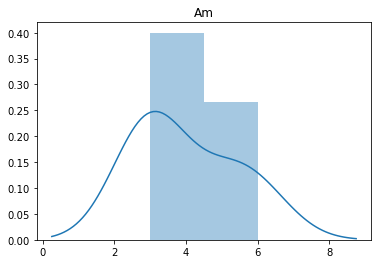

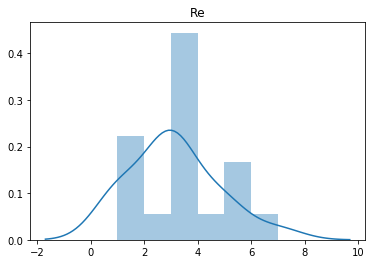

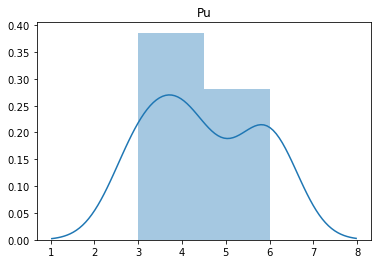

problem plotting Be


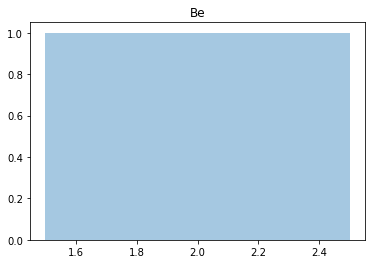

In [13]:
for elem in elemental_oxidation_states_flat.keys():
    try:
        plt.show()
        plt.title(elem)
        sns.distplot(elemental_oxidation_states_flat[elem])
    except Exception:
        print(f"problem plotting {elem}")

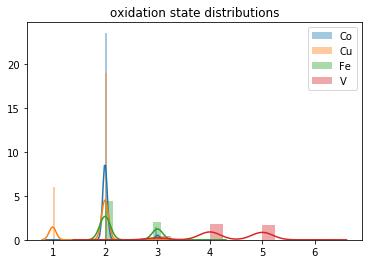

In [14]:
plt.figure()
plt.title("oxidation state distributions")

sns.distplot(elemental_oxidation_states_flat["Co"], label="Co", norm_hist=True)
sns.distplot(elemental_oxidation_states_flat["Cu"], label="Cu", norm_hist=True)
sns.distplot(elemental_oxidation_states_flat["Fe"], label="Fe", norm_hist=True)
sns.distplot(elemental_oxidation_states_flat["V"], label="V", norm_hist=True)
# sns.distplot(elemental_oxidation_states_flat['Re'], label="Re", norm_hist=True)

plt.legend()

(0.8, 4)

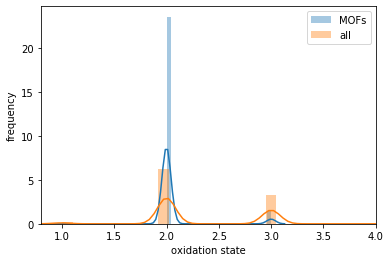

In [31]:
sns.distplot(
    elemental_oxidation_states_flat["Co"],
    label="MOFs",
    norm_hist=True,
)
sns.distplot(
    elemental_oxidation_states_flat_reference["Co"], label="all", norm_hist=True
)
plt.legend()
plt.ylabel("frequency")
plt.xlabel("oxidation state")
plt.xlim(0.8, 4)

/home/kevin/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/home/kevin/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/home/kevin/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/kevin/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
/home/kevin/anaconda3/envs/ml/lib/python3.

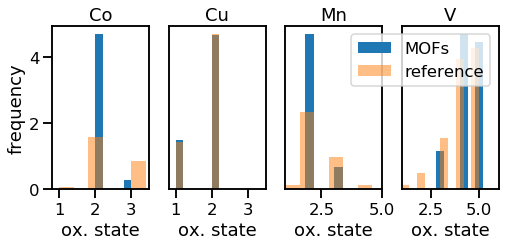

In [76]:
sns.set_context("talk")
fig, axes = plt.subplots(1, 4, figsize=(8, 3))

axes[0].hist(elemental_oxidation_states_flat["Co"], label="MOFs", normed=1)
axes[0].hist(
    elemental_oxidation_states_flat_reference["Co"],
    label="reference",
    normed=1,
    alpha=0.5,
)
axes[0].set_xlim(0.8, 3.5)
axes[0].set_title("Co")
axes[0].set_ylabel("frequency")
axes[0].set_xlabel("ox. state")


axes[1].hist(elemental_oxidation_states_flat["Cu"], label="MOFs", normed=1)
axes[1].hist(
    elemental_oxidation_states_flat_reference["Cu"],
    label="reference",
    normed=1,
    alpha=0.5,
)
axes[1].set_xlim(0.8, 3.5)
axes[1].set_title("Cu")
axes[1].set_xlabel("ox. state")

axes[2].hist(elemental_oxidation_states_flat["Mn"], label="MOFs", normed=1)
axes[2].hist(
    elemental_oxidation_states_flat_reference["Mn"],
    label="reference",
    normed=1,
    alpha=0.5,
)
axes[2].set_xlim(1, 5)
axes[2].set_title("Mn")
axes[2].set_xlabel("ox. state")

axes[3].hist(elemental_oxidation_states_flat["V"], label="MOFs", normed=1)
axes[3].hist(
    elemental_oxidation_states_flat_reference["V"],
    label="reference",
    normed=1,
    alpha=0.5,
)
axes[3].set_xlim(1, 6)
axes[3].set_title("V")
axes[3].set_xlabel("ox. state")

axes[3].legend()
for a in [1, 2, 3]:
    axes[a].set_yticks([], [])
# fig.tight_layout()

plt.savefig("ox_distribution.png", bbox_inches="tight", dpi=400)

In [43]:
len(elemental_oxidation_states_flat["Co"])

4816

The distributions itselfs are meaningful. Some elements, like Ag, are always in the same oxidation state whereas others, like Re or V show a wide distribution of oxidation states.

(array([2.770e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.666e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

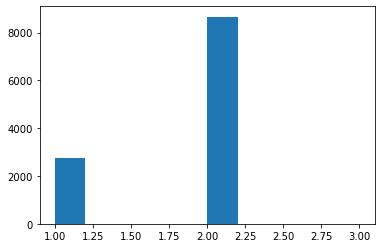

In [50]:
plt.hist(elemental_oxidation_states_flat["Cu"], label="Cu")

In [51]:
from pymatgen import Structure

In [52]:
s = Structure.from_file(
    "/home/kevin/Dropbox (LSMO)/proj56_shared/6_ml_on_database/structures/but-155_cellopt.cif"
)

In [59]:
s[0].species.elements[0].is_metal

True